<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/descritiva_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

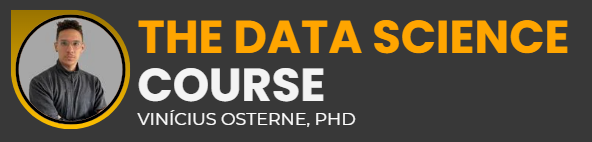


# Análise Descritiva e Exploratória de Dados - Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
n = 100

# Variáveis contínuas (com outliers)
continua1 = np.random.normal(50, 10, n)
continua1[::10] *= 3  # adicionando outliers

continua2 = np.random.normal(30, 5, n)
continua2[::15] *= 2  # adicionando alguns outliers

# Variável categórica
categorica = np.random.choice(['A', 'B', 'C'], size=n)

# Variável discreta
discreta = np.random.poisson(3, n).astype(float)

# Variável binária
binaria = np.random.choice([0, 1], size=n)

# Variável texto
texto = np.random.choice(['Lorem', 'Ipsum', 'Dolor'], size=n)

# Adicionando valores nulos
continua1[5] = np.nan
categorica[15] = np.nan
discreta[25] = np.nan
continua2[35] = np.nan

# Criando o DataFrame
df = pd.DataFrame({
    'continua1': continua1,
    'continua2': continua2,
    'categorica': categorica,
    'discreta': discreta,
    'binaria': binaria,
    'texto': texto
})

print("Shape:", df.shape)
print(df.head())


Shape: (100, 6)
    continua1  continua2 categorica  discreta  binaria  texto
0  164.901425  45.846293          B       1.0        0  Dolor
1   48.617357  27.896773          B       1.0        0  Lorem
2   56.476885  28.286427          A       3.0        1  Lorem
3   65.230299  25.988614          A       5.0        1  Dolor
4   47.658466  29.193571          A       3.0        0  Ipsum


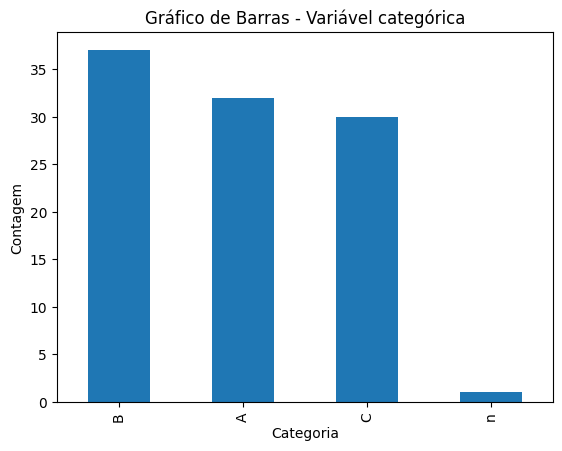

In [21]:
# ================================================
# Gráfico de Barras
# ================================================
# Para que serve? Comparar frequências de categorias
# Quando usar? Dados categóricos
# Cuidados? Evitar excesso de categorias
df['categorica'].value_counts().plot(kind='bar')
plt.title('Gráfico de Barras - Variável categórica')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

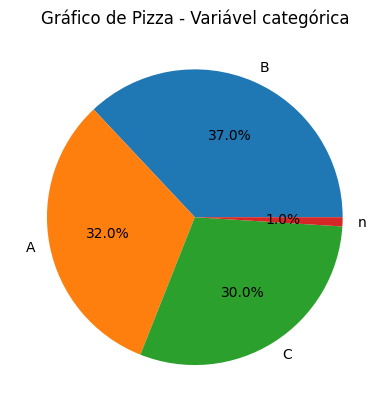

In [22]:
# ================================================
# Gráfico de Pizza
# ================================================
# Para que serve? Mostrar proporções entre categorias
# Quando usar? Poucas categorias
# Cuidados? Difícil comparar ângulos próximos
df['categorica'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gráfico de Pizza - Variável categórica')
plt.ylabel('')
plt.show()

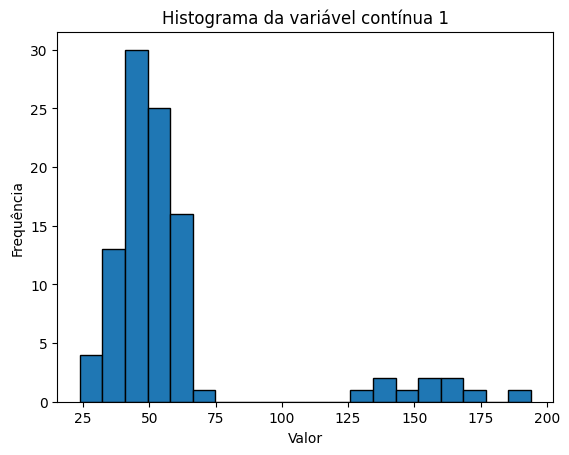

In [5]:
# ================================================
# Histograma
# ================================================
# Para que serve? Mostrar a distribuição de uma variável numérica
# Quando usar? Quando queremos entender a frequência de valores
# Cuidados? Sensível a outliers e ao número de bins
plt.hist(df['continua1'].dropna(), bins=20, edgecolor='black')
plt.title('Histograma da variável contínua 1')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

/tmp/ipython-input-2201584449.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['continua1'].dropna(), shade=True)


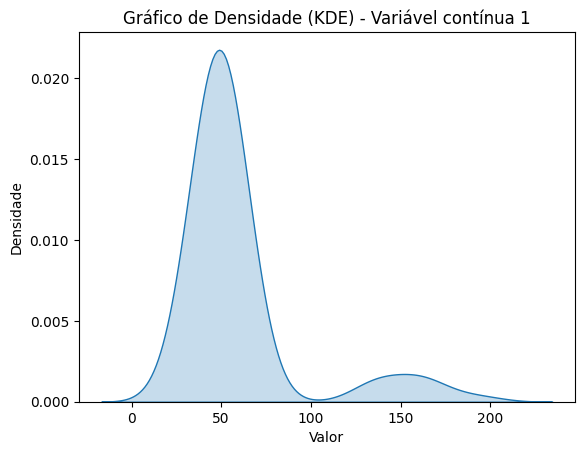

In [23]:
# ================================================
# KDE Plot (Densidade)
# ================================================
# Para que serve? Visualizar a estimativa da densidade de probabilidade
#                 de uma variável contínua (curva suave)
# Quando usar? Para observar a forma da distribuição sem depender de bins
# Cuidados? Pode distorcer a distribuição se o bandwidth não estiver bem ajustado
sns.kdeplot(df['continua1'].dropna(), shade=True)
plt.title('Gráfico de Densidade (KDE) - Variável contínua 1')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

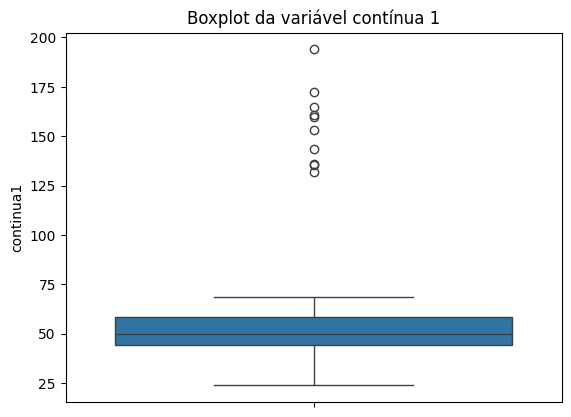

In [24]:
# ================================================
# Boxplot
# ================================================
# Para que serve? Visualizar mediana, quartis e outliers
# Quando usar? Comparar distribuições e detectar outliers
# Cuidados? Pode ocultar padrões se poucos dados
sns.boxplot(y=df['continua1'])
plt.title('Boxplot da variável contínua 1')
plt.show()

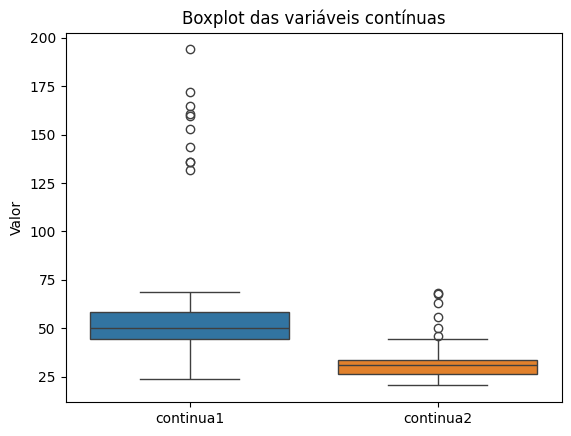

In [8]:
# ================================================
# Boxplot das duas variáveis contínuas
# ================================================
# Para que serve? Visualizar mediana, quartis e outliers de múltiplas variáveis
# Quando usar? Comparar distribuições de duas ou mais variáveis numéricas
# Cuidados? Escalas muito diferentes podem dificultar a comparação
sns.boxplot(data=df[['continua1', 'continua2']], orient='v')
plt.title('Boxplot das variáveis contínuas')
plt.ylabel('Valor')
plt.show()

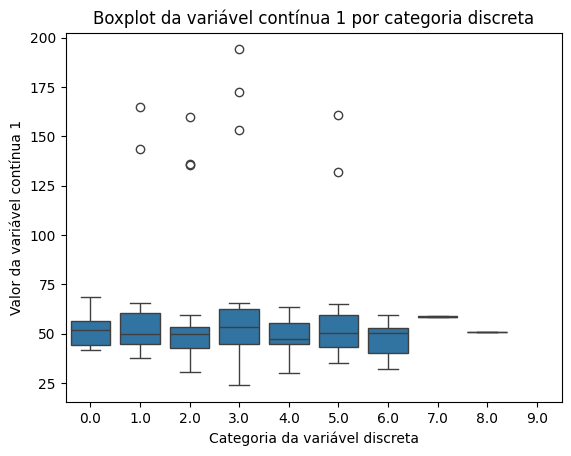

In [25]:
# ================================================
# Boxplot por categoria (variável discreta)
# ================================================
# Para que serve? Comparar a distribuição de uma variável contínua
#                entre diferentes categorias/valores de outra variável
# Quando usar? Quando queremos entender como a variável contínua
#              varia por grupos
# Cuidados? Pode ficar difícil de ler se houver muitas categorias
sns.boxplot(x='discreta', y='continua1', data=df)
plt.title('Boxplot da variável contínua 1 por categoria discreta')
plt.xlabel('Categoria da variável discreta')
plt.ylabel('Valor da variável contínua 1')
plt.show()

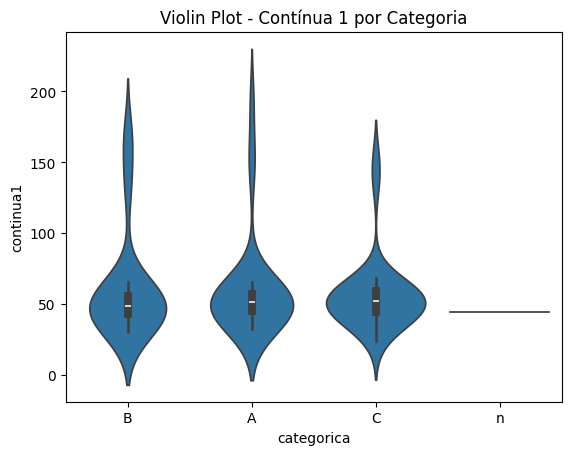

In [26]:
# ================================================
# Violin Plot
# ================================================
# Para que serve? Combinar boxplot com densidade
# Quando usar? Comparar distribuições
# Cuidados? Pode ser confuso se poucas observações
sns.violinplot(x='categorica', y='continua1', data=df)
plt.title('Violin Plot - Contínua 1 por Categoria')
plt.show()

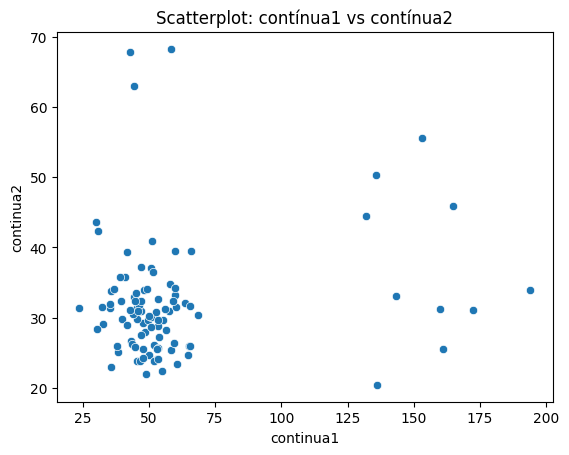

In [11]:
# ================================================
# Scatterplot
# ================================================
# Para que serve? Mostrar relação entre duas variáveis numéricas
# Quando usar? Ver correlações, tendências ou agrupamentos
# Cuidados? Overplotting se muitos pontos
sns.scatterplot(x='continua1', y='continua2', data=df)
plt.title('Scatterplot: contínua1 vs contínua2')
plt.show()

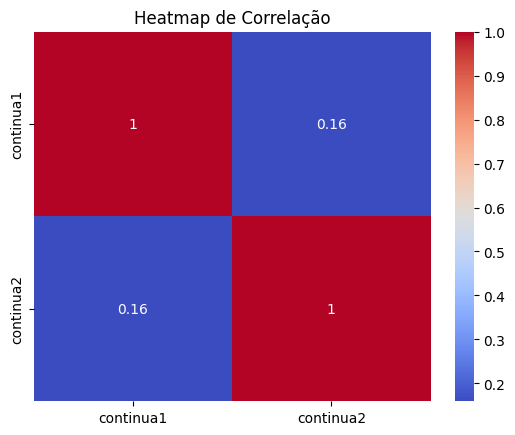

In [27]:
# ================================================
# Heatmap de Correlação
# ================================================
# Para que serve? Visualizar correlação entre variáveis numéricas
# Quando usar? Identificar relações lineares
# Cuidados? Só correlação linear, pode não captar relações complexas
sns.heatmap(df[['continua1', 'continua2']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

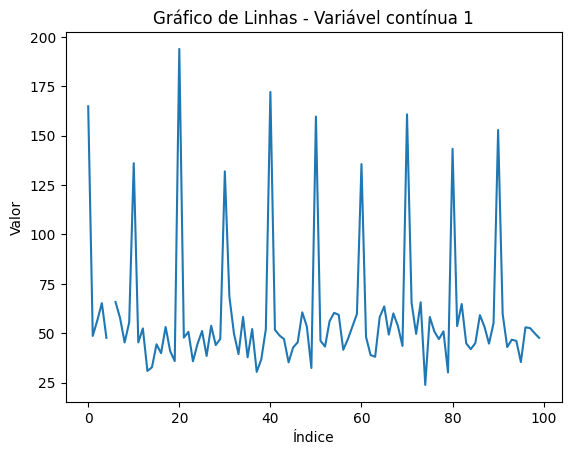

In [13]:
# ================================================
# Gráfico de Linhas
# ================================================
# Para que serve? Mostrar tendências ao longo do índice (tempo, ordem)
# Quando usar? Séries temporais ou sequências ordenadas
# Cuidados? Não usar se os dados não tiverem ordem natural
plt.plot(df['continua1'].reset_index(drop=True))
plt.title('Gráfico de Linhas - Variável contínua 1')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()

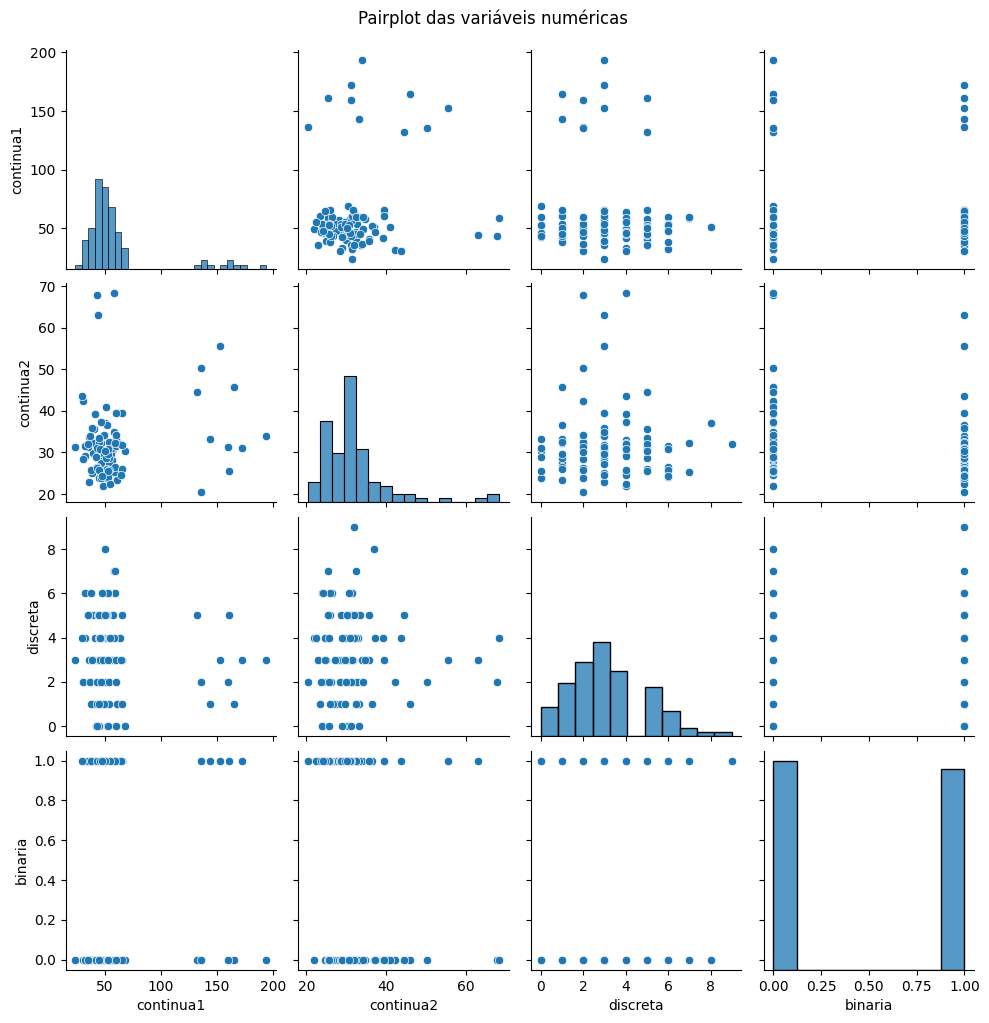

In [14]:
# ================================================
# Pairplot
# ================================================
# Para que serve? Mostrar distribuições e relações entre várias variáveis numéricas
# Quando usar? Exploração inicial de dados multivariados
# Cuidados? Pesado para muitas variáveis
sns.pairplot(df[['continua1', 'continua2', 'discreta', 'binaria']])
plt.suptitle('Pairplot das variáveis numéricas', y=1.02)
plt.show()

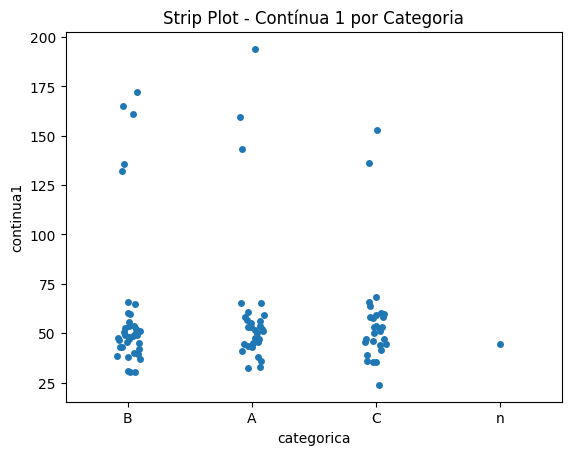

In [15]:
# ================================================
# Strip Plot
# ================================================
# Para que serve? Mostrar todos os pontos individuais de uma variável
#                 contínua separados por categoria
# Quando usar? Quando queremos ver a distribuição de pontos por grupo
# Cuidados? Pode haver sobreposição (usar jitter)
sns.stripplot(x='categorica', y='continua1', data=df, jitter=True)
plt.title('Strip Plot - Contínua 1 por Categoria')
plt.show()

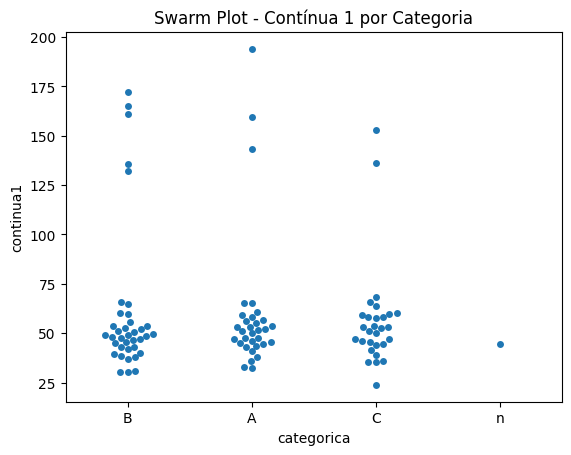

In [16]:
# ================================================
# Swarm Plot
# ================================================
# Para que serve? Similar ao strip plot, mas evita sobreposição de pontos
# Quando usar? Comparação de valores individuais entre categorias
# Cuidados? Pesado para datasets grandes
sns.swarmplot(x='categorica', y='continua1', data=df)
plt.title('Swarm Plot - Contínua 1 por Categoria')
plt.show()


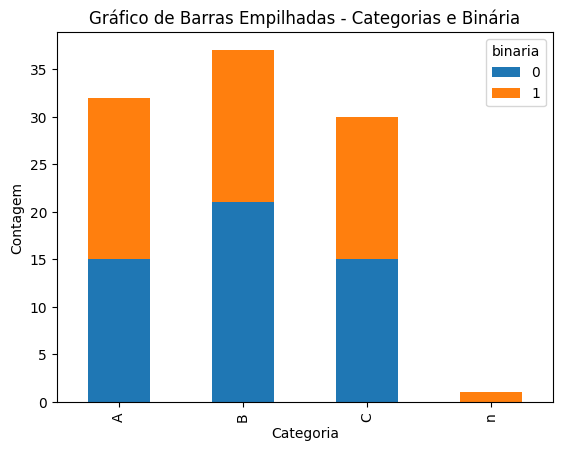

In [17]:
# ================================================
# Barras Empilhadas
# ================================================
# Para que serve? Mostrar a composição de subcategorias em cada categoria
# Quando usar? Comparação entre categorias e subcategorias
# Cuidados? Difícil de ler se muitas subcategorias
stacked_data = df.groupby(['categorica', 'binaria']).size().unstack()
stacked_data.plot(kind='bar', stacked=True)
plt.title('Gráfico de Barras Empilhadas - Categorias e Binária')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()


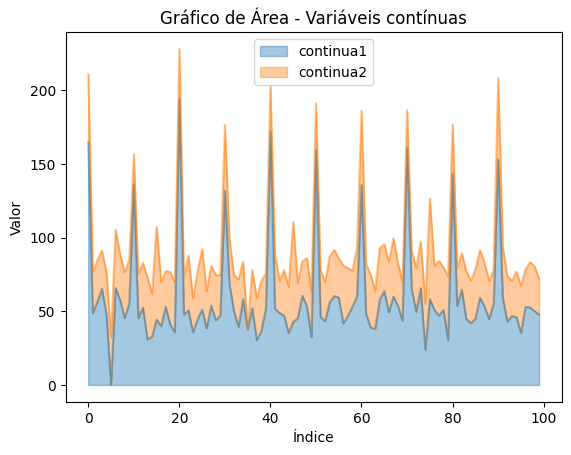

In [18]:
# ================================================
# Gráfico de Área
# ================================================
# Para que serve? Mostrar evolução acumulada ou proporções ao longo do índice
# Quando usar? Séries temporais ou dados ordenados
# Cuidados? Não recomendado se não houver ordem temporal ou sequencial
df[['continua1', 'continua2']].plot(kind='area', alpha=0.4)
plt.title('Gráfico de Área - Variáveis contínuas')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.show()

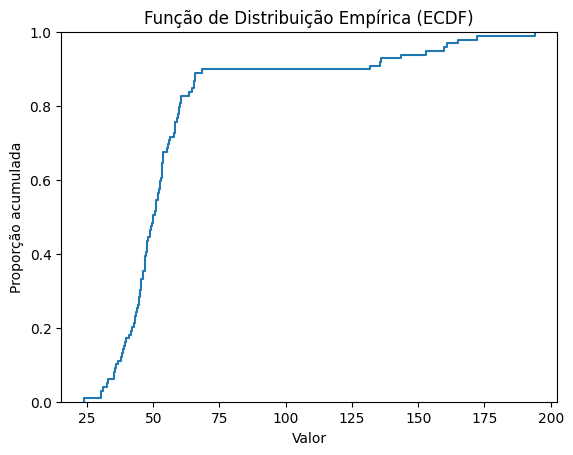

In [19]:
# ================================================
# ECDF (Empirical Cumulative Distribution Function)
# ================================================
# Para que serve? Mostrar a proporção acumulada de observações
# Quando usar? Comparar distribuições cumulativas
# Cuidados? Menos comum, mas útil para estatística
sns.ecdfplot(df['continua1'].dropna())
plt.title('Função de Distribuição Empírica (ECDF)')
plt.xlabel('Valor')
plt.ylabel('Proporção acumulada')
plt.show()

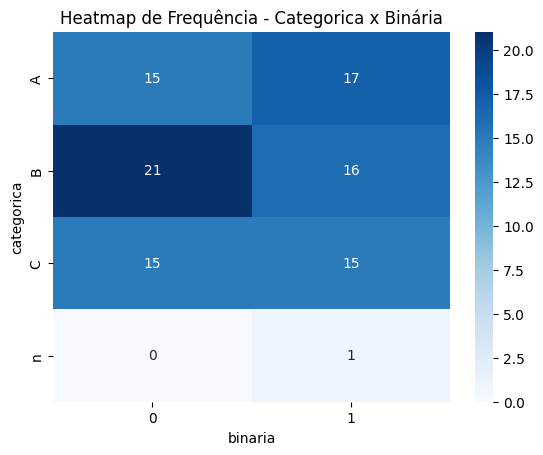

In [20]:
# ================================================
# Heatmap de Frequência
# ================================================
# Para que serve? Mostrar contagem cruzada entre duas variáveis categóricas
# Quando usar? Comparação de categorias cruzadas
# Cuidados? Necessário pivotar dados
freq = pd.crosstab(df['categorica'], df['binaria'])
sns.heatmap(freq, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap de Frequência - Categorica x Binária')
plt.show()